# Data

In [16]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [35]:
data = pd.read_csv("analysis_data/analysis_data_normalized.csv", index_col = [0])
data["child_mortality"] = data["child_mortality"].astype(int)
data["food_supply"] -= data["food_supply"].mean()
data["food_supply"] /= data["food_supply"].std()
data["med_beds"] -= data["med_beds"].mean()
data["med_beds"] /= data["med_beds"].std()
data["co2_emission"] -= data["co2_emission"].mean()
data["co2_emission"] /= data["co2_emission"].std()
data["gender_equality"] -= data["gender_equality"].mean()
data["gender_equality"] /= data["gender_equality"].std()
data

,country,child_mortality,food_supply,med_beds,co2_emission,gender_equality
0,Afghanistan,60,-2.763008,-1.242540,-1.063447,-1.558142
1,Albania,8,0.758070,-0.284864,-0.825780,-0.052888
2,United Arab Emirates,7,0.472226,-0.857133,2.698314,-1.168484
3,Argentina,9,0.537190,0.587166,-0.324117,0.657037
4,Armenia,12,-0.159229,0.299085,-0.772411,-0.293088
...,...,...,...,...,...,...
93,Uruguay,7,0.305917,-0.537908,-0.757532,0.678388
94,United States,6,1.740333,-0.304329,1.797969,0.592984
95,Uzbekistan,20,-0.151434,0.100542,-0.629503,-0.725448
96,Vietnam,20,-0.078673,-0.374403,-0.709506,-0.164981


In [36]:
data["child_mortality"].mean()

12.591836734693878

In [37]:
data["child_mortality"].std()

13.754726823666408

In [38]:
data["food_supply"].mean()

-7.386381755669409e-16

In [39]:
data["food_supply"].std()

0.9999999999999998

In [40]:
data["med_beds"].mean()

-4.5315225494904345e-18

In [41]:
data["med_beds"].std()

1.0000000000000002

In [42]:
data["co2_emission"].mean()

-3.398641912117826e-17

In [43]:
data["co2_emission"].std()

1.0

In [45]:
data["gender_equality"].mean()

-1.9032394707859825e-16

In [44]:
data["gender_equality"].std()

1.0

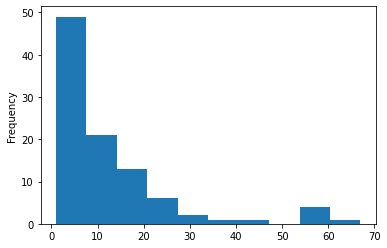

In [58]:
data['child_mortality'].plot.hist(bins=10)
plt.show()

# Prior

In [67]:
model_prior=CmdStanModel(stan_file='prior.stan')

sim=model_prior.sample(data={}, fixed_param=True, iter_sampling=1000, iter_warmup=0, chains = 1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [54]:
df_prior = sim.draws_pd()
df_prior

,lp__,accept_stat__,alpha,lambda,child_mortality,food_supply_coef,co2_emission_coef,gender_equality_coef,med_beds_coef,food_supply,co2_emission,med_beds,gender_equality
0,0.0,0.0,1.403520,13.825700,16.0,0.557482,0.570808,0.517201,0.506327,-0.159023,0.173116,-0.619615,2.951610
1,0.0,0.0,0.969056,0.118501,0.0,0.624445,0.532425,0.327052,0.451604,-1.929760,-1.959520,-1.831790,-0.080479
2,0.0,0.0,0.358766,1.169090,1.0,0.619143,0.571151,0.536981,0.396390,1.007530,-1.413120,0.564854,-0.452790
3,0.0,0.0,-0.013000,0.893712,0.0,0.644731,0.615173,0.499370,0.283944,0.133218,0.508450,-2.402750,0.368868
4,0.0,0.0,3.527710,39.030900,46.0,0.577737,0.545286,0.602154,0.617589,1.133350,0.231491,-0.088848,-0.978972
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,3.207240,44.510400,46.0,0.522397,0.483880,0.520390,0.462401,0.053637,0.604648,0.193686,0.342672
996,0.0,0.0,1.434910,1.576220,2.0,0.444545,0.520947,0.519966,0.295837,-1.571450,1.246470,-1.647750,-0.852309
997,0.0,0.0,2.958310,9.296470,5.0,0.493892,0.407329,0.391104,0.365112,-0.131962,-0.417686,-0.289064,-0.991618
998,0.0,0.0,0.646559,0.643032,1.0,0.456950,0.606773,0.474362,0.552379,-2.038400,-0.480930,0.564103,-0.371979


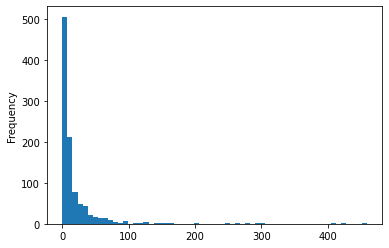

In [61]:
df_prior['child_mortality'].plot.hist(bins=60)
plt.show()

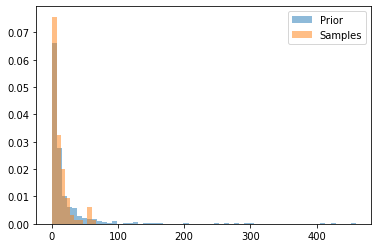

In [62]:
fig, ax = plt.subplots()
ax.hist(df_prior['child_mortality'], bins=60, alpha=0.5, density=True, label='Prior')
ax.hist(data["child_mortality"], bins=10, alpha=0.5, density=True, label='Samples')
ax.legend()
plt.show()

In [63]:
abs(df_prior['child_mortality'].mean() - data['child_mortality'].mean())

6.570163265306121

# Model fitting

In [69]:
model_1=CmdStanModel(stan_file='posterior_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [70]:
fit_1=model_1.sample(data=dict(N=len(data), child_mortality=data.child_mortality.values, co2_emission=data.co2_emission.values, food_supply=data.food_supply.values, med_beds=data.med_beds.values, gender_equality=data.gender_equality.values), seed=20052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status







chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)




chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▋  | 00:00 Iteration: 1400 / 2000 [ 70%]  (Sampling)


chain 1 |█████████▌| 00:00 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [74]:
df_fit_1 = fit_1.draws_pd()
df_fit_1

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,co2_emission_coef,food_supply_coef,...,predicted_child_mortality[89],predicted_child_mortality[90],predicted_child_mortality[91],predicted_child_mortality[92],predicted_child_mortality[93],predicted_child_mortality[94],predicted_child_mortality[95],predicted_child_mortality[96],predicted_child_mortality[97],predicted_child_mortality[98]
0,2179.74,0.983416,0.453529,3.0,15.0,0.0,-2177.03,2.27427,-0.055694,-0.374632,...,14.0,10.0,11.0,4.0,6.0,6.0,2.0,8.0,12.0,50.0
1,2178.31,0.919655,0.453529,3.0,7.0,0.0,-2176.79,2.31274,-0.011633,-0.369950,...,18.0,10.0,7.0,10.0,5.0,8.0,2.0,16.0,12.0,74.0
2,2180.18,0.983928,0.453529,3.0,11.0,0.0,-2176.26,2.30201,-0.118125,-0.296382,...,21.0,8.0,5.0,12.0,6.0,6.0,3.0,13.0,18.0,65.0
3,2179.33,0.886777,0.453529,4.0,15.0,0.0,-2177.51,2.28069,-0.028782,-0.372698,...,19.0,7.0,4.0,7.0,7.0,8.0,6.0,16.0,12.0,56.0
4,2177.67,0.971384,0.453529,3.0,7.0,0.0,-2176.61,2.28114,-0.110492,-0.295969,...,13.0,2.0,10.0,6.0,6.0,9.0,1.0,13.0,9.0,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2179.54,0.993811,0.396627,3.0,7.0,0.0,-2176.46,2.30300,-0.132022,-0.326560,...,16.0,6.0,10.0,11.0,7.0,5.0,1.0,11.0,16.0,63.0
3996,2179.48,0.989057,0.396627,4.0,15.0,0.0,-2177.68,2.24059,-0.058493,-0.324663,...,16.0,9.0,10.0,11.0,2.0,9.0,5.0,7.0,10.0,78.0
3997,2177.06,0.854231,0.396627,3.0,7.0,0.0,-2175.31,2.18246,-0.072876,-0.365342,...,7.0,6.0,9.0,7.0,3.0,4.0,3.0,12.0,15.0,64.0
3998,2175.43,0.892736,0.396627,2.0,3.0,0.0,-2174.89,2.17004,-0.052525,-0.362526,...,9.0,6.0,8.0,9.0,4.0,8.0,3.0,7.0,14.0,64.0


In [75]:
means = []
medians = []
stds = []
for i in range(1, 99):
    means.append(df_fit_1["predicted_child_mortality[" + str(i) + "]"].mean())

In [76]:
abs(np.array(means).mean() - data['child_mortality'].mean())

0.0022346938775505976

# MODEL FITTING 2

In [80]:
model_2=CmdStanModel(stan_file='posterior_2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [81]:
fit_2=model_2.sample(data=dict(N=len(data), child_mortality=data.child_mortality.values, co2_emission=data.co2_emission.values, food_supply=data.food_supply.values, med_beds=data.med_beds.values, gender_equality=data.gender_equality.values), seed=20052020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)





chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)

chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)





chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |███████▋  | 00:01 Iteration: 1400 / 2000 [ 70%]  (Sampling)



chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)



chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [82]:
df_fit_2 = fit_2.draws_pd()
df_fit_2

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha[1],alpha[2],alpha[3],...,predicted_child_mortality[89],predicted_child_mortality[90],predicted_child_mortality[91],predicted_child_mortality[92],predicted_child_mortality[93],predicted_child_mortality[94],predicted_child_mortality[95],predicted_child_mortality[96],predicted_child_mortality[97],predicted_child_mortality[98]
0,2293.02,0.998363,0.159901,5.0,31.0,0.0,-2229.39,3.99024,2.58010,1.08845,...,40.0,16.0,15.0,7.0,2.0,2.0,7.0,17.0,28.0,34.0
1,2295.86,0.995166,0.159901,5.0,31.0,0.0,-2249.48,4.03889,1.91307,1.84545,...,61.0,19.0,19.0,14.0,18.0,11.0,3.0,20.0,17.0,51.0
2,2308.88,0.992513,0.159901,5.0,31.0,0.0,-2256.84,3.83519,2.34499,1.39232,...,53.0,16.0,17.0,11.0,2.0,7.0,16.0,24.0,26.0,51.0
3,2311.28,0.755985,0.159901,5.0,31.0,0.0,-2253.56,3.84292,2.30534,1.85792,...,36.0,6.0,18.0,14.0,15.0,9.0,4.0,26.0,16.0,60.0
4,2311.42,0.930572,0.159901,5.0,31.0,0.0,-2261.38,4.07787,2.51342,1.09761,...,51.0,8.0,13.0,8.0,10.0,13.0,5.0,16.0,9.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2307.03,0.971966,0.175374,4.0,15.0,0.0,-2243.86,3.84610,2.16089,1.56256,...,48.0,9.0,9.0,13.0,7.0,7.0,10.0,20.0,12.0,30.0
3996,2307.89,0.945017,0.175374,5.0,31.0,0.0,-2260.24,3.87961,2.14019,1.58283,...,51.0,14.0,14.0,5.0,10.0,7.0,5.0,23.0,24.0,41.0
3997,2303.07,0.858659,0.175374,5.0,31.0,0.0,-2249.76,3.90765,2.08063,1.88169,...,52.0,19.0,18.0,6.0,8.0,5.0,7.0,20.0,21.0,47.0
3998,2304.62,0.893766,0.175374,5.0,31.0,0.0,-2245.89,4.09963,1.84558,1.61858,...,30.0,17.0,15.0,7.0,7.0,7.0,6.0,22.0,15.0,37.0


In [84]:
means = []
stds = []
for i in range(1, 99):
    means.append(df_fit_2["predicted_child_mortality[" + str(i) + "]"].mean())

In [85]:
abs(np.array(means).mean() - data['child_mortality'].mean())

0.08010459183673646

# Model comparison

In [86]:
compare_model_loo = az.compare(
    {
        "fit_1": az.from_cmdstanpy(fit_1),
        "fit_2": az.from_cmdstanpy(fit_2)
    },
    ic="loo",
    scale="deviance"
)

In [87]:
compare_model_waic = az.compare(
    {
        "fit_1": az.from_cmdstanpy(fit_1),
        "fit_2": az.from_cmdstanpy(fit_2)
    },
    ic="waic",
    scale="deviance"
)

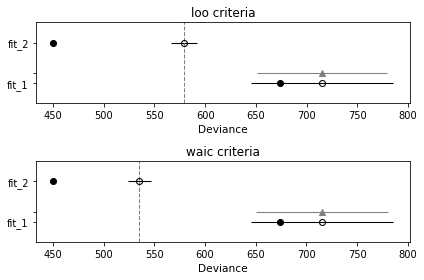

In [88]:
_, ax = plt.subplots(nrows=2, ncols=1)
az.plot_compare(compare_model_loo, insample_dev=True, ax=ax[0])
ax[0].set_title("loo criteria")
az.plot_compare(compare_model_waic, insample_dev=True, ax=ax[1])
ax[1].set_title("waic criteria")
plt.tight_layout()
plt.show()

In [89]:
print(compare_model_loo)

       rank         loo      p_loo       d_loo    weight         se  \
fit_2     0  579.514572  64.826769    0.000000  0.577383  12.923534   
fit_1     1  715.131933  20.689046  135.617361  0.422617  70.050458   

             dse  warning loo_scale  
fit_2   0.000000     True  deviance  
fit_1  64.120407    False  deviance  


In [90]:
print(compare_model_waic)

       rank        waic     p_waic      d_waic    weight         se  \
fit_2     0  535.234182  42.686574    0.000000  0.882389  11.217060   
fit_1     1  715.241015  20.743587  180.006833  0.117611  70.210369   

             dse  warning waic_scale  
fit_2   0.000000     True   deviance  
fit_1  65.259648     True   deviance  
